<a href="https://colab.research.google.com/github/Alexxakiode/Feed-Forward-Neural-Network-Multilayer-Perceptron---classifying-images-on-FashionMNIST-Dataset/blob/main/FashionMNIST_Model_KerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying FashionMNIST Dataset using Keras Autotuner

# Library imports

In [ ]:
# Import the pandas library for data exploration
import pandas as pd
import numpy as np
from google.colab import files

import cv2
import tensorflow as tf
import keras
import seaborn as sns
import os


from tensorflow import keras
from IPython.display import display
from tensorflow.keras import utils
from keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# plot the history of the training
import matplotlib.pyplot as plt

# split the data into train and test
from sklearn.model_selection import train_test_split

# Normalizer library 
from sklearn.preprocessing import normalize

# Other libraries
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

RANDOM_SEED=100
seed =RANDOM_SEED


# FashionMNIST Dataset loading

In [ ]:
# Import fashion_mnist module
#from keras import fashion_mnist
from keras.datasets import fashion_mnist

# Data visualisation

In [ ]:
# ! pip install keras-tuner

In [ ]:
! pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
(img_train, label_train), (img_test, label_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Normalizing the data

In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0


In [ ]:
assert img_train.shape == (60000, 28, 28)
assert img_test.shape == (10000, 28, 28)
assert label_train.shape == (60000,)
assert label_test.shape == (10000,)

# Encoding the output dataset

In [ ]:
# One hot encode the output data
y_train_cat = keras.utils.to_categorical(img_train, 10)
y_test_cat = keras.utils.to_categorical(img_test, 10)

Show some samples of the dataset

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


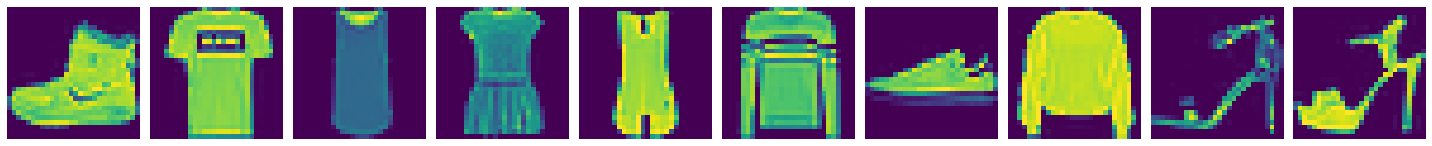

In [ ]:
plotImages(img_train [:50])

# Building the Keras Auto Model

In [ ]:
def build_model(hp):
  model5 = keras.Sequential()
  model5.add(keras.layers.Flatten(input_shape=(28, 28)))

  #T
  #Choose
  hp_units=hp.Int("units", min_value=32, max_value=512, step=32)
  model5.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model5.add(keras.layers.Dense(10))

  #
  #
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model5.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model5
  

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                    #  factors=3,
                     directory='my_dir',
                     project_name='intro_to_kt')


In [ ]:
# model5.summary()

In [ ]:
tuner.search(img_train, label_train,epochs=60, validation_split=0.2)

Trial 30 Complete [00h 00m 42s]
val_accuracy: 0.8627499938011169

Best val_accuracy So Far: 0.8944166898727417
Total elapsed time: 00h 13m 42s


In [ ]:
# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
# Build the model with the best hp.
model = tuner.hypermodel.build(best_hps)
history=model.fit(img_train, label_train,epochs=60, validation_split=0.2)

Epoch 1/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5097 - accuracy: 0.8198 - val_loss: 0.3908 - val_accuracy: 0.8617
Epoch 2/60
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8628 - val_loss: 0.3599 - val_accuracy: 0.8689
Epoch 3/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3398 - accuracy: 0.8769 - val_loss: 0.3377 - val_accuracy: 0.8788
Epoch 4/60
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8849 - val_loss: 0.3496 - val_accuracy: 0.8781
Epoch 5/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.8914 - val_loss: 0.3189 - val_accuracy: 0.8837
Epoch 6/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2755 - accuracy: 0.8973 - val_loss: 0.3459 - val_accuracy: 0.8733
Epoch 7/60
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2631 - accuracy: 0.9021 - val_loss: 0.3531 - val_accuracy:

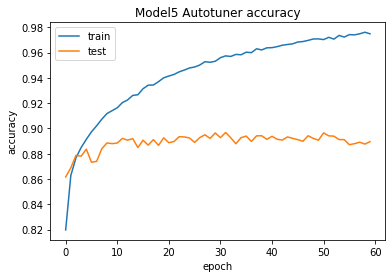

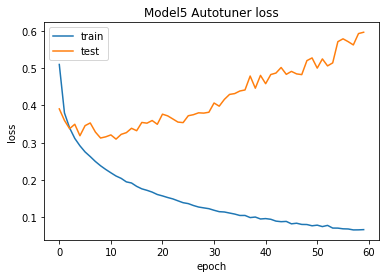

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model5 Autotuner accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model5 Autotuner loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
evaluation = model.evaluate(img_test, label_test)
print('[test loss, test accuracy]:', evaluation)

313/313 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.8847
[test loss, test accuracy]: [0.6522889733314514, 0.8847000002861023]


## Predictions

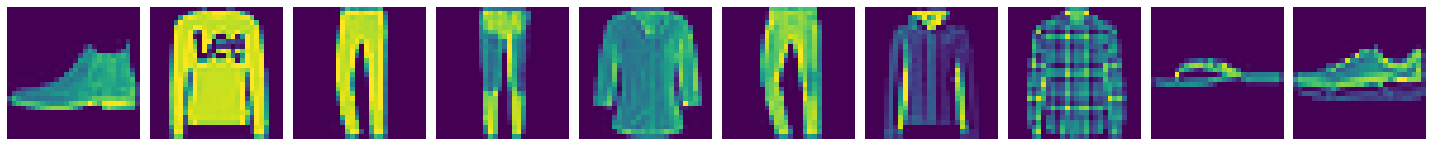

In [ ]:
plotImages(img_test[:20])

In [ ]:
predictions=np.argmax(model.predict(img_test[:10]),axis=-1)
print(predictions)

1/1 [==============================] - 0s 91ms/step
[9 2 1 1 6 1 4 6 5 7]
